In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn


In [2]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [6]:
(df['y']=='yes').mean(), df.isna().sum().sum()

(0.11523999115239991, 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AE42A3860>,
      dtype=object)

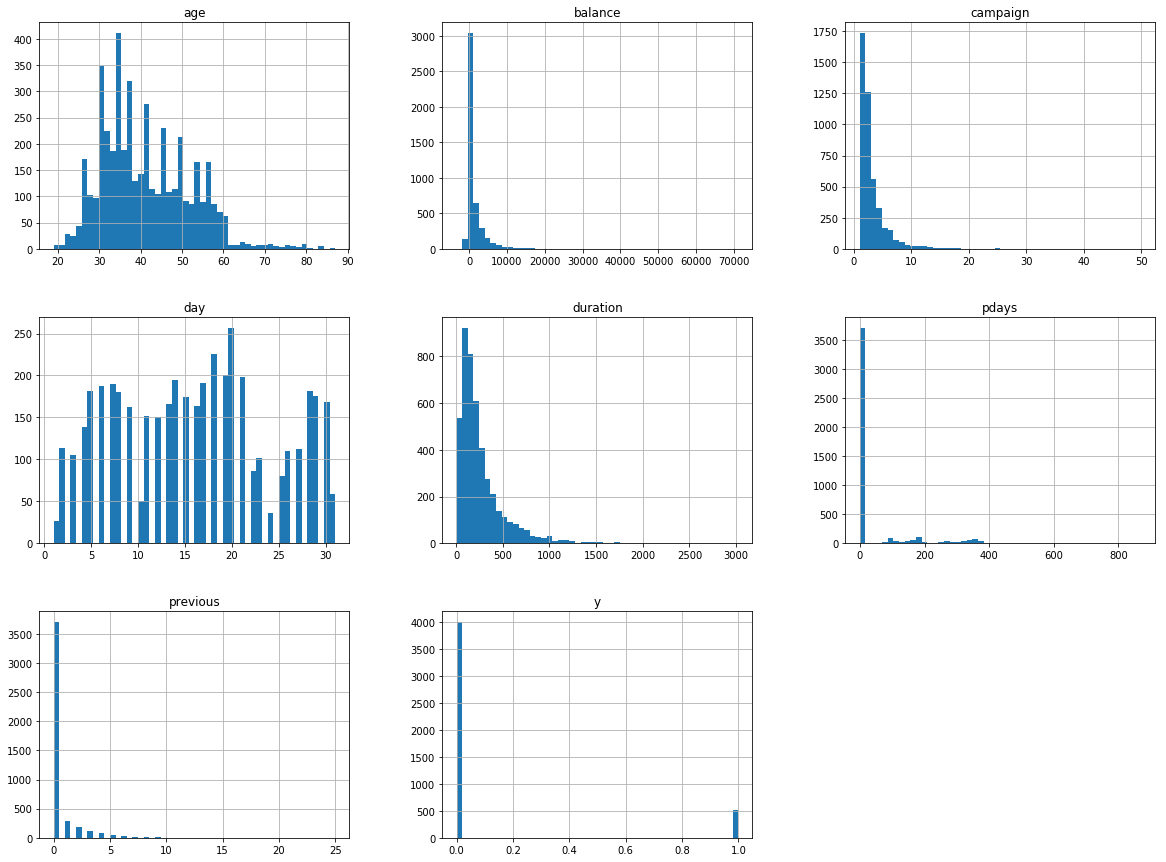

In [24]:
df.hist(bins=50, figsize=(20,15))

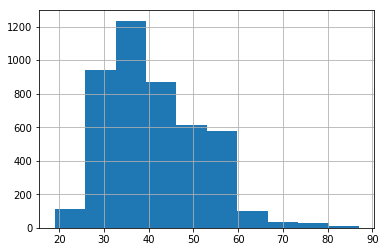

In [5]:
df['age'].hist()

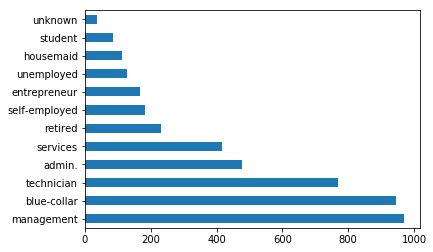

In [7]:
j = df['job']
j.value_counts().plot.barh()

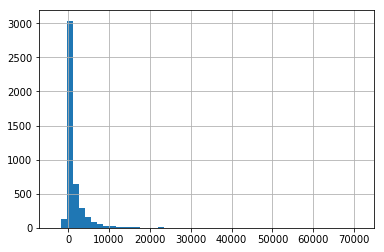

In [8]:
df.balance.hist(bins=50)

In [9]:
df['y']= df['y'].replace('no','0',regex=True)

In [10]:
df['y']= df['y'].replace('yes','1',regex=True)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [17]:
df['y']= df['y'].astype(np.int)

In [18]:
loan_hot = pd.get_dummies(df)

In [19]:
loan_hot.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [22]:
y = loan_hot['y']
X = loan_hot.drop(columns='y')
X.shape, y.shape

((4521, 51), (4521,))

In [23]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train.shape, X_test.shape,y_train, y_test 

((3390, 51), (1131, 51), 1412    0
 2117    0
 3443    0
 1488    0
 2620    0
 1983    0
 1022    0
 1779    0
 4421    0
 1803    0
 3916    0
 665     0
 3223    0
 2181    0
 1017    1
 3881    1
 1924    0
 2758    0
 1550    0
 1235    0
 245     0
 266     0
 3196    0
 1114    0
 63      0
 4174    0
 1602    0
 2281    0
 2476    0
 4258    0
        ..
 1528    0
 1267    0
 1899    1
 3005    1
 2734    0
 189     1
 1806    0
 975     1
 2747    0
 2047    0
 2558    0
 1082    0
 474     0
 2904    0
 4117    1
 3385    1
 1184    0
 2433    1
 2391    0
 769     0
 1685    0
 130     0
 2919    0
 3171    0
 3444    0
 4426    0
 466     0
 3092    0
 3772    0
 860     0
 Name: y, Length: 3390, dtype: int32, 2398    0
 800     0
 2288    0
 2344    0
 3615    0
 3548    0
 1115    0
 4053    0
 838     0
 4141    0
 1189    0
 1461    0
 3819    1
 3614    0
 179     0
 4011    0
 4237    1
 1321    0
 4018    0
 2174    0
 3134    0
 1878    0
 1485    1
 3963    0
 937

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(2)
knn.fit(X_train, y_train) #핏팅시키기, 학습시키기

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [32]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9212389380530973, 0.8868258178603006)

In [33]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

In [35]:
rg = Ridge().fit(X_train, y_train)


In [37]:
rg.score(X_train, y_train), rg.score(X_test, y_test)

(0.3050736811332636, 0.23103980705358385)

In [38]:
lr = Lasso().fit(X_train, y_train)

In [39]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.17206798863369954, 0.16231136070328056)

In [41]:
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [42]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [43]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9569321533923304, 0.883289124668435)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [47]:
rf.score(X_train,y_train),rf.score(X_test,y_test)

(1.0, 0.9018567639257294)

In [48]:
tree.feature_importances_

array([0.08090687, 0.06044129, 0.07898569, 0.34852632, 0.01443837,
       0.03030668, 0.03616317, 0.0024657 , 0.        , 0.        ,
       0.00292146, 0.        , 0.00563592, 0.00358216, 0.00550612,
       0.        , 0.00598527, 0.        , 0.00260535, 0.00923342,
       0.01450645, 0.00291799, 0.        , 0.00485555, 0.01586055,
       0.00404029, 0.        , 0.        , 0.00736077, 0.        ,
       0.0063831 , 0.00291799, 0.00233439, 0.        , 0.        ,
       0.01187282, 0.01290302, 0.        , 0.00306813, 0.        ,
       0.00291799, 0.01031376, 0.02370817, 0.01594437, 0.        ,
       0.03608099, 0.        , 0.        , 0.00847784, 0.12583207,
       0.        ])

In [49]:
rf.feature_importances_

array([0.08939571, 0.08744778, 0.07354836, 0.25011287, 0.03638197,
       0.04132683, 0.02226936, 0.00902472, 0.0104838 , 0.0030485 ,
       0.00433399, 0.01033177, 0.00835639, 0.00460889, 0.00559675,
       0.00447063, 0.00989785, 0.0021932 , 0.00240881, 0.00845546,
       0.01387143, 0.01049295, 0.00837753, 0.01241503, 0.01390835,
       0.00653492, 0.00242358, 0.00280898, 0.01215962, 0.01431685,
       0.00656174, 0.00716245, 0.01062727, 0.00492466, 0.00850564,
       0.01392612, 0.01077407, 0.00269515, 0.00716903, 0.00363516,
       0.00888951, 0.01198399, 0.01255102, 0.01062113, 0.00965886,
       0.01860307, 0.00644133, 0.01096802, 0.00459306, 0.04032772,
       0.00837812])

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

In [52]:
gbc.score(X_train,y_train), gbc.score(X_test, y_test)

(0.9359882005899705, 0.896551724137931)

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
adc.score(X_train,y_train), adc.score(X_test, y_test)

(0.9047197640117994, 0.896551724137931)

In [56]:
from sklearn.svm import SVC
import mglearn

In [57]:
sv = SVC(gamma='auto').fit(X_train, y_train)

In [58]:
sv.score(X_train,y_train), sv.score(X_test,y_test)

(0.9985250737463127, 0.8894783377541998)

In [59]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [60]:
mlp = MLPClassifier().fit(X_train,y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test)

(0.9079646017699115, 0.8921308576480991)

In [61]:
mlp =MLPClassifier(hidden_layer_sizes=(100,40,30)).fit(X_train, y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test)

(0.8480825958702065, 0.8452696728558797)

In [62]:
from sklearn.model_selection import cross_val_score

In [64]:
scores_tree = cross_val_score(tree,X, y, cv=5)
scorestree_, np.mean(scores)

(array([0.89171271, 0.88053097, 0.89269912, 0.89712389, 0.8949115 ]),
 0.8913956387815969)

In [67]:
scores_rf = cross_val_score(rf,X, y, cv=5)
scores_rf, np.mean(scores)

(array([0.90607735, 0.89159292, 0.89380531, 0.90154867, 0.89823009]),
 0.8913956387815969)

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid ={'C':[0.1,1,10,50,100],'gamma':[0.001,0.01,0.1,1,10]} #dict
grid_search = GridSearchCV(SVC(),param_grid, return_train_score=True)

In [72]:
grid_search=grid_search.fit(X,y)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [73]:
grid_search.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)